NOTE:
1-This file contains the code for generating the CSV files for the top county candidates for each client. They are further analyzed, and the actual answers along with graphs are presented in my PDF answer document. 

2-Please place the below 5 CSV files in the same folder as this program for execution without file errors.
BEA - US, States, Counties - Personal Income.csv
Components of Population Change - US, States, Counties.csv
Population by Age and Sex - US, States, Counties.csv
Population by Race - US, States, Counties.csv
Population Estimates - US, States, Counties.csv

3-For all calculations involving population, I'm using the mean value from the recent 3 years of data.

Step 1: Performing calculation on the income data set to indentify the low, middle and high income ranges for per-capita income

In [85]:
#Calculating the Median per-capita income of all the counties
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_inc1 = pd.read_csv('BEA - US, States, Counties - Personal Income.csv')
df_inc = df_inc1[(df_inc1['Countyfips']!=0) & (df_inc1['Linecode Description']=='Per capita personal income (dollars)                   ') 
                   & (df_inc1['Year'].between(2017,2019,inclusive="both"))]
df_income=pd.DataFrame(df_inc.groupby(['Description'])['Data'].median().reset_index())
df_income.rename(columns={'Data':'Median Per-capita income'},inplace=True)

print(df_inc['Data'].min())
print(df_inc['Data'].max())
print(df_inc['Data'].median())
print(df_inc['Data'].quantile([0.5, 0.75]))

0
230141
41831.0
0.50    41831.0
0.75    48718.0
Name: Data, dtype: float64


Client 1:
Your client #1 has several Senior Living Communities in the USA and is looking for the next 3 locations (Counties) to open.
The client's clientele is typically a mid-income senior.
Which locations would you recommend and why? Justify your choice

In [86]:
#client 1 calculations for senior population and mid-income groups
df_county=pd.read_csv('Population by Age and Sex - US, States, Counties.csv')
df_c=df_county[(df_county['Countyfips']!=0) & (df_county['Year'].between(2017,2019,inclusive="both"))]
df_1=pd.DataFrame(df_c.groupby(['Description'])['Population 65+'].mean().reset_index())
df_top20_senior=df_1.nlargest(20, ['Population 65+'])
df_merged1=pd.merge(df_top20_senior,df_income,how='inner',on=('Description'))
df_top3=df_merged1[df_merged1['Median Per-capita income'].between(40000,55000,inclusive="both")]
df_top3.to_csv("Client 1 output.csv")
print(df_top3.nlargest(3,['Population 65+']))

             Description  Population 65+  Median Per-capita income
2    Maricopa County, AZ   668721.000000                   48113.0
6  Miami-Dade County, FL   442146.666667                   53148.0
7       Kings County, NY   360434.000000                   53346.0


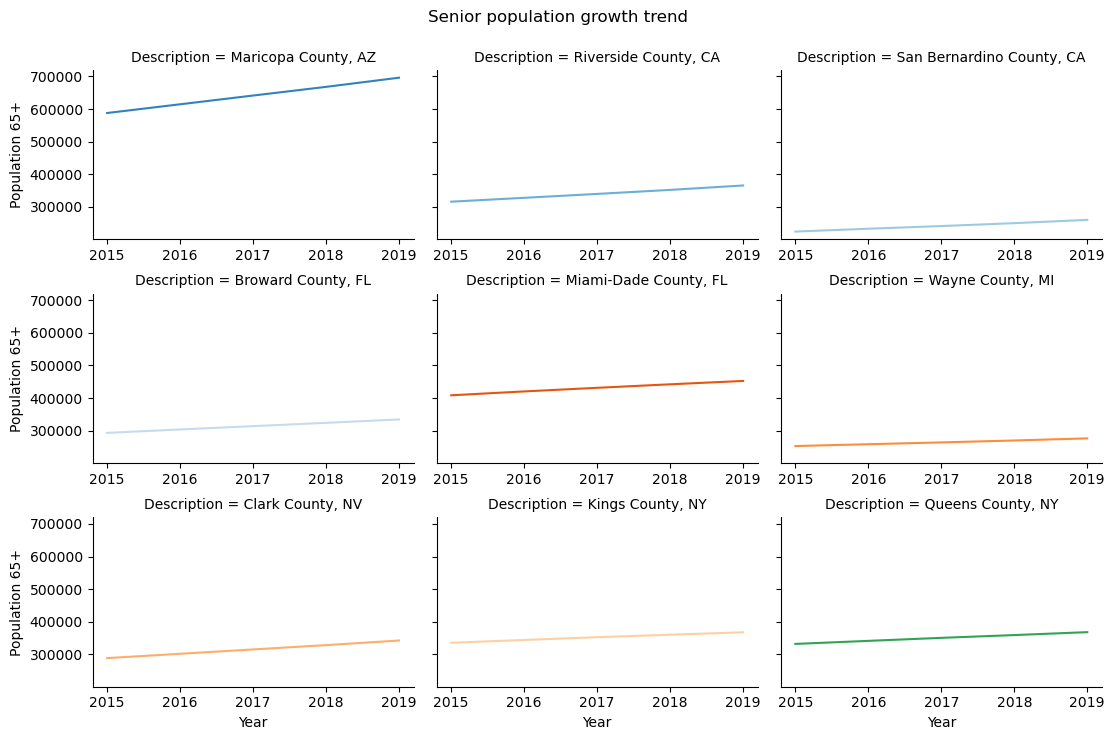

In [87]:
#graph for client 1
df_cc=df_county[(df_county['Countyfips']!=0) & (df_county['Year'].between(2015,2019,inclusive="both"))]
county_list=['Maricopa County, AZ',
'Miami-Dade County, FL',
'Queens County, NY',
'Kings County, NY',
'Riverside County, CA',
'Clark County, NV',
'Broward County, FL',
'Wayne County, MI',
'San Bernardino County, CA'
]
df_senior_graph=df_cc[df_cc['Description'].isin(county_list)]
grid = sns.FacetGrid(df_senior_graph, col="Description", hue="Description", palette="tab20c",col_wrap=3, height=2.5, aspect=1.5, sharex=False )
grid.map(plt.plot, "Year", "Population 65+")
plt.tight_layout()
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Senior population growth trend")
plt.show()
plt.savefig("client 1 graph.png")

Client 2: Your client #2 is a pre-K school and is looking to open a 2 new locations somewhere in the USA.
The school is focused on mid and low income areas.
The client is also specialized in bilingual education (english and spanish).
Find the 2 new locations. Justify your choice.

In [88]:
#Client 2 calculations for child population, bilingual population and low to middle income counties
df_county2=pd.read_csv('Population by Age and Sex - US, States, Counties.csv')
df_c=df_county2[(df_county2['Countyfips']!=0) & (df_county2['Year'].between(2017,2019,inclusive="both"))]
df_child_count=pd.DataFrame(df_c.groupby(['Description'])['Population 0-4'].mean().reset_index())
df_top20_child_cnt=df_child_count.nlargest(20, ['Population 0-4'])

df_l=pd.read_csv('Population by Race - US, States, Counties.csv')
df_lang=df_l[(df_l['Countyfips']!=0) & (df_l['Year'].between(2017,2019,inclusive="both"))]
df_lang['Bilingual_Total']=df_lang['White Alone']+df_lang['Black Alone']+df_lang['Hispanic']
df_bilingual=pd.DataFrame(df_lang.groupby(['Description'])['Bilingual_Total'].max())


df_merged2=df_top20_child_cnt.merge(pd.merge(df_income,df_bilingual,on='Description'),on='Description')
df_top2=df_merged2[(df_merged2['Median Per-capita income'].between(0,50000,inclusive="both"))&(df_merged2['Population 0-4']>102000) &(df_merged2['Bilingual_Total']>1630000)]
df_top2.to_csv("Client 2 output.csv")
print(df_top2.nlargest(2,'Median Per-capita income'))

            Description  Population 0-4  Median Per-capita income  \
3   Maricopa County, AZ   277676.333333                   48113.0   
14     Clark County, NV   139261.333333                   47759.0   

    Bilingual_Total  
3         5409070.0  
14        2589233.0  


C:\Users\Shilpa\AppData\Local\Temp\ipykernel_11316\2445089777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['Bilingual_Total']=df_lang['White Alone']+df_lang['Black Alone']+df_lang['Hispanic']


<Figure size 640x480 with 0 Axes>

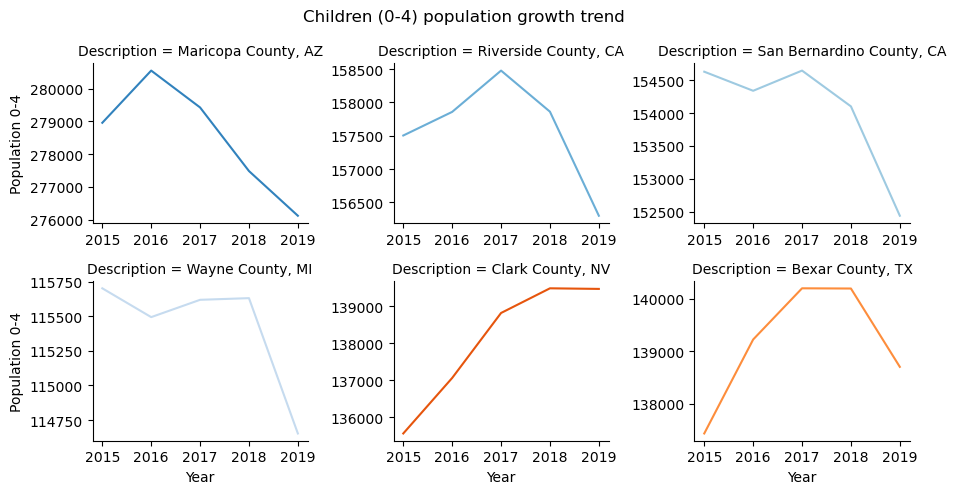

In [89]:
#graph for client 2 - Child population trend
df_c2=df_county2[(df_county2['Countyfips']!=0) & (df_county2['Year'].between(2015,2019,inclusive="both"))]
county_list2=['Maricopa County, AZ',
'Riverside County, CA',
'San Bernardino County, CA',
'Bexar County, TX',
'Clark County, NV',
'Wayne County, MI'
]
df_school_graph=df_c2[df_c2['Description'].isin(county_list2)]
grid = sns.FacetGrid(df_school_graph, col="Description", hue="Description", 
                     palette="tab20c",col_wrap=3, height=2.5, aspect=1.25, sharex=False, sharey=False)
grid.map(plt.plot, "Year", "Population 0-4")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Children (0-4) population growth trend")
plt.tight_layout()
plt.show()

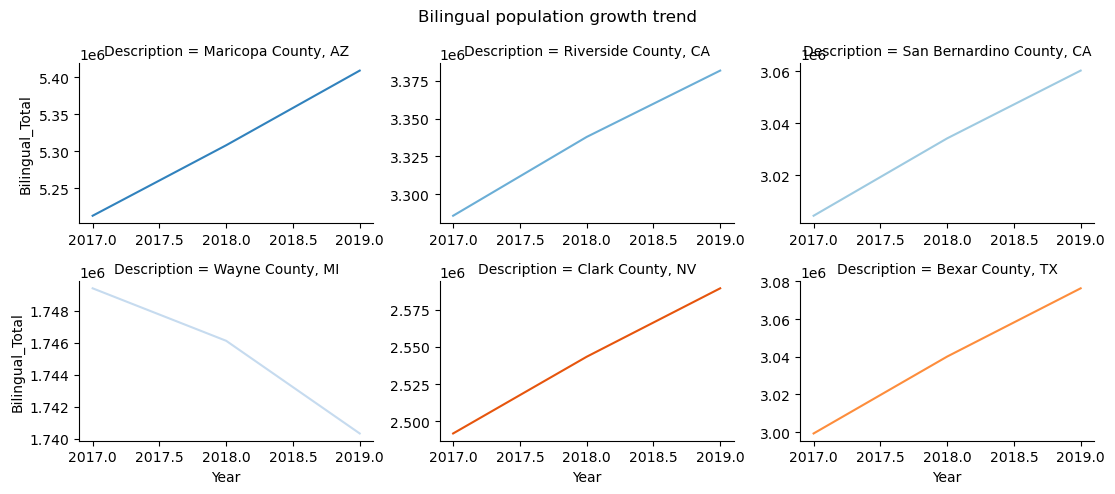

In [90]:
#graph2 for client 2 - Bilingual population trend
county_list2=['Maricopa County, AZ',
'Riverside County, CA',
'San Bernardino County, CA',
'Bexar County, TX',
'Clark County, NV',
'Wayne County, MI'
]
df_school_graph2=df_lang[df_lang['Description'].isin(county_list2)]
grid = sns.FacetGrid(df_school_graph2, col="Description", hue="Description", 
                     palette="tab20c",col_wrap=3, height=2.5, aspect=1.5, sharex=False, sharey=False)
grid.map(plt.plot, "Year", "Bilingual_Total")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Bilingual population growth trend")
plt.tight_layout()
plt.show()

Client 3: Your client #3 has many stores specialized in food and entertainment for teenagers. Some of the main features of their locations are:
- They sell "World Sweets", meaning, they sell cakes, candies and other sweet food from different places of the world
- They are an "upscale" type of business so their public is very wealthy
- In addition to food, they also feature modern music (sometimes live), video game tournments
Which 2 places would you recommend them to install their next location? Justify your choice.


In [91]:
#Client 3 - calculation for teenager population, international immigrants and high income groups
df_county=pd.read_csv('Population by Age and Sex - US, States, Counties.csv')
df_c=df_county[(df_county['Countyfips']!=0) & (df_county['Year'].between(2015,2019,inclusive="both"))]
df_teen_count=pd.DataFrame(df_c.groupby(['Description'])['Population 5-17'].mean().reset_index())
df_top20_teen_cnt=df_teen_count.nlargest(20, ['Population 5-17'])

df_i=pd.read_csv('Components of Population Change - US, States, Counties.csv')
df_i1=df_i[(df_i['Countyfips']!=0)&(df_i['Year']==2019)]
df_international=pd.DataFrame(df_i1.groupby(['Description'])['Net International Migration'].mean().reset_index())


df_merge3=pd.merge(pd.merge(df_top20_teen_cnt,df_income,on='Description'),df_international,on='Description')
df_merge3_fil=df_merge3[df_merge3['Median Per-capita income']>55000]
df_merge3_fil.to_csv("client 3 op.csv")
print(df_merge3_fil)

               Description  Population 5-17  Median Per-capita income  \
0   Los Angeles County, CA        1603287.4                   62300.0   
1        Harris County, TX         893225.8                   58235.0   
2          Cook County, IL         822917.8                   63436.0   
4        Orange County, CA         516692.4                   68917.0   
5     San Diego County, CA         513057.2                   61147.0   
6        Dallas County, TX         492369.0                   60780.0   
14         King County, WA         319768.4                   91161.0   
16  Santa Clara County, CA         311609.8                  110344.0   

    Net International Migration  
0                        8911.0  
1                       24967.0  
2                        7659.0  
4                        2765.0  
5                        2756.0  
6                        9889.0  
14                      15419.0  
16                       8703.0  


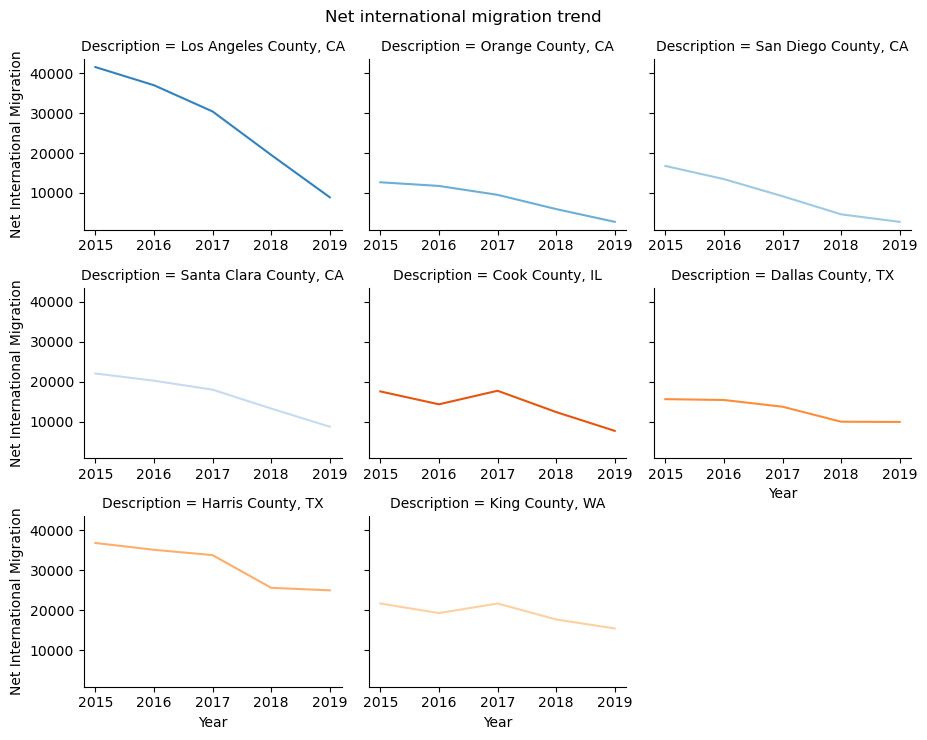

In [92]:
#graph for client 3 - shows the international immigration trends
df_i=pd.read_csv('Components of Population Change - US, States, Counties.csv')
df_i1=df_i[(df_i['Countyfips']!=0)&(df_i['Year'].between(2015,2019,inclusive="both"))]
df_i3=df_i1[(df_i1['Countyfips']!=0) & (df_i1['Year'].between(2015,2019,inclusive="both"))]
county_list3=['Los Angeles County, CA',
'Harris County, TX',
'Cook County, IL',
'Orange County, CA',
'San Diego County, CA',
'Dallas County, TX',
'King County, WA',
'Santa Clara County, CA'
]
df_int_graph=df_i3[df_i3['Description'].isin(county_list3)]
#print(df_int_graph)
grid = sns.FacetGrid(df_int_graph, col="Description", hue="Description", palette="tab20c",col_wrap=3, height=2.5, aspect=1.25, sharex=False)
grid.map(plt.plot, "Year", "Net International Migration")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Net international migration trend")
plt.tight_layout()
plt.show()

Client 4: The client #4 is a beauty store focused on products for womans. Their typical consumer has between 17 and 55 years and is a mid class or above.
Which 5 places would you recommend them to install their stores? Justify your choice.


In [93]:
#client 4 calculations - finding the % of female population and % of population in ages 18-54
df_county4=pd.read_csv('Population by Age and Sex - US, States, Counties.csv')
df_c=df_county4[(df_county4['Countyfips']!=0) & (df_county4['Year'].between(2015,2019,inclusive="both"))]
df_women_count=pd.DataFrame(df_c.groupby(['Description']).aggregate({'Total Population':'mean','Population 18-54':'mean','Female Population':'mean'}).reset_index())
df_women_count['Female Population Percentage']=(df_women_count['Female Population']/df_women_count['Total Population'])*100
df_women_count['18-54 Population Percentage']=(df_women_count['Population 18-54']/df_women_count['Total Population'])*100
df_top50_age_cnt=df_women_count[(df_women_count['Female Population Percentage']>51) & (df_women_count['18-54 Population Percentage']>52)]

df_merge4=pd.merge(df_top50_age_cnt,df_income,on='Description')
df_merge_filtered=df_merge4[df_merge4['Median Per-capita income']>55000]

df_merge_filtered.to_csv("client 4 op.csv")
print("Counties for analysis:")
print(df_merge_filtered)



Counties for analysis:
                         Description  Total Population  Population 18-54  \
2   Alexandria  Independent City, VA          157612.8           93954.8   
6              Chittenden County, VT          162646.4           88456.6   
9                    Cobb County, GA          751218.0          391855.0   
11               Davidson County, TN          687488.2          381253.4   
14          District of Columbia, DC          692683.4          414827.4   
19                 Fulton County, GA         1036199.8          571898.2   
30            Mecklenburg County, NC         1074474.6          583581.2   
31              Middlesex County, MA         1600841.6          835087.6   
32               New York County, NY         1631993.0          947912.8   
35                 Orange County, NC          144836.0           79404.8   
37           Philadelphia County, PA         1579074.6          838052.8   
41    Richmond  Independent City, VA          226622.4          1

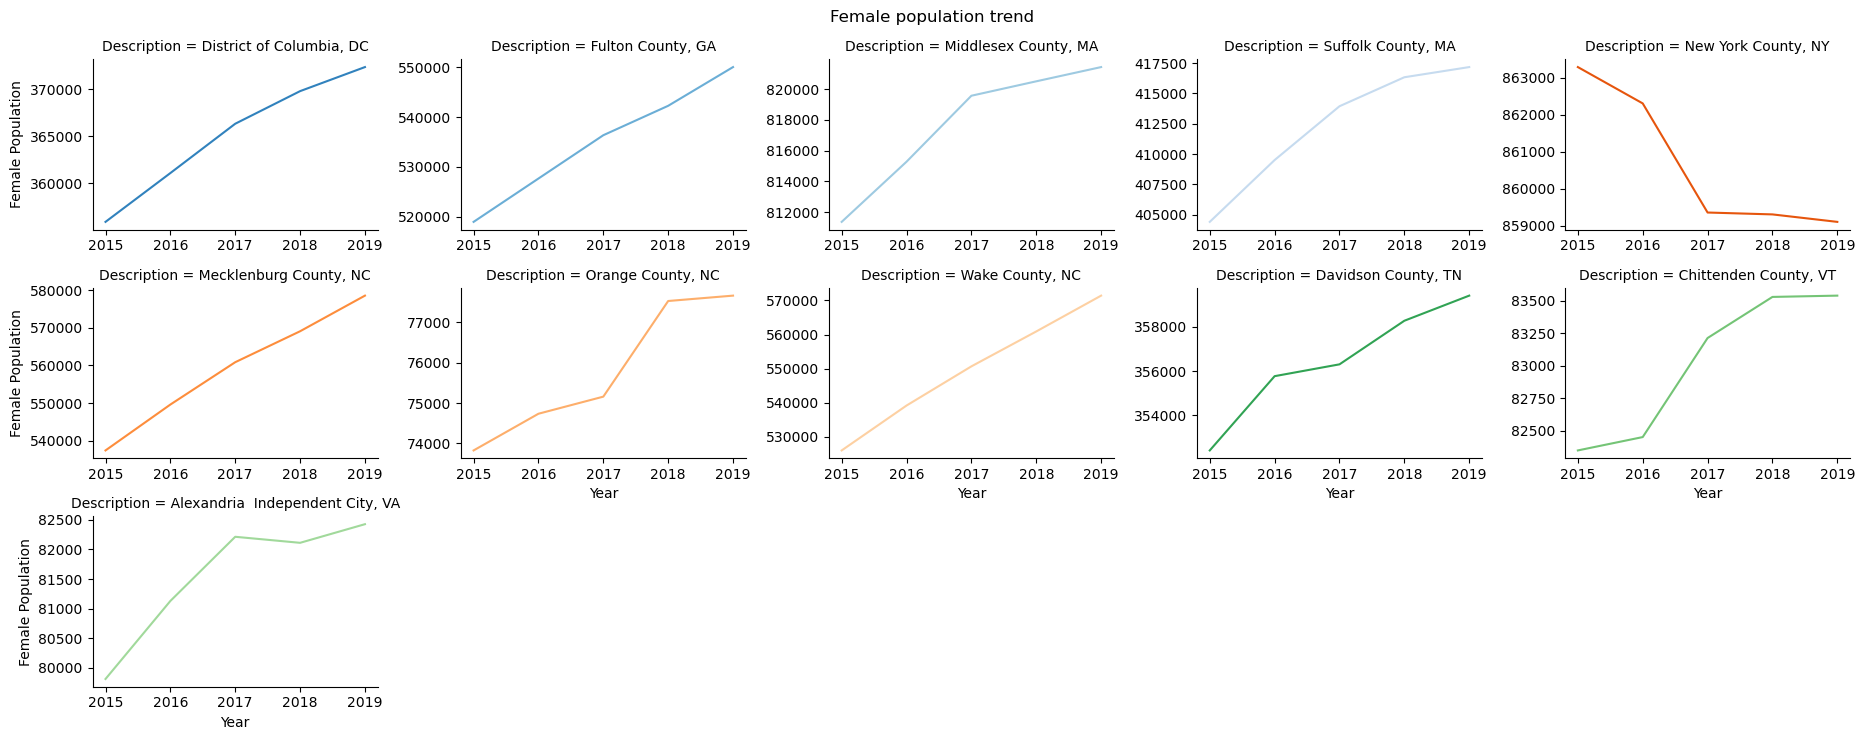

In [94]:
#Graph for client 4 - Female population trend
county_list_4=['Chittenden County, VT',
'Middlesex County, MA',
'Wake County, NC',
'Fulton County, GA',
'Alexandria  Independent City, VA',
'Suffolk County, MA',
'Davidson County, TN',
'Mecklenburg County, NC',
'Orange County, NC',
'District of Columbia, DC',
'New York County, NY']

#graph for client 4

df_c4_fil=df_c[df_c['Description'].isin(county_list_4)]
grid = sns.FacetGrid(df_c4_fil, col="Description", hue="Description", palette="tab20c",col_wrap=5, height=2.5, aspect=1.5, sharex=False, sharey=False)
grid.map(plt.plot, "Year","Female Population")
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle("Female population trend")
plt.tight_layout()
plt.show()

Client 5
Your client #5 is Disney.
Recently Universal Studios announced that they will open a new park in Frisco (Denton county).
Universal has other similar parks with different attactions based in Florida and in California. This new park in Frisco will be focused on the young kids and attractions' theme like Trolls, Shrek, Madagascar among others.
Based on the data that you have, should Disney also open a park nearby? Justify your answer.


In [95]:
#client 5 - displaying statewise population statistics for Texas, California and Florida
df_county5=pd.read_csv('Population by Age and Sex - US, States, Counties.csv')
state_list5=['Texas','California','Florida']
df_c55=df_county5[(df_county5['Countyfips']==0) & (df_county5['Description'].isin(state_list5)) & (df_county5['Year'].between(2015,2019,inclusive="both"))]
df__avg_5=pd.DataFrame(df_c55.groupby(['Description']).aggregate({'Total Population':'mean','Population 0-4':'mean','Population 5-17':'mean','Population 18-24':'mean','Population Under 18':'mean'}).reset_index())
print(df__avg_5)

print("---------")

df_c5_1=df_county5[(df_county5['Countyfips']==0) & (df_county5['Description'].isin(state_list5)) & (df_county5['Year']==2019)]
df__recent_5=pd.DataFrame(df_c5_1.groupby(['Description']).aggregate({'Total Population':'sum','Population 0-4':'sum','Population 5-17':'sum','Population 18-24':'sum','Population Under 18':'sum'}).reset_index())
print(df__recent_5)

df_est=pd.read_csv('Population Estimates - US, States, Counties.csv')
df_estimates=df_est[(df_est['Countyfips']==0) & (df_est['Description'].isin(state_list5)) & (df_est['Year']==2020)]
print(df_estimates)
df_estimates.to_csv("estimates_c5.csv")

  Description  Total Population  Population 0-4  Population 5-17  \
0  California        39283494.0       2454293.4        6569004.8   
1     Florida        20901637.2       1130882.8        3052130.8   
2       Texas        28260857.2       2002879.2        5335614.2   

   Population 18-24  Population Under 18  
0         3789582.6            9023298.2  
1         1750303.8            4183013.6  
2         2783493.8            7338493.4  
---------
  Description  Total Population  Population 0-4  Population 5-17  \
0  California        39512223.0       2383716.0        6510925.0   
1     Florida        21477737.0       1139742.0        3090187.0   
2       Texas        28995881.0       1990891.0        5408919.0   

   Population 18-24  Population Under 18  
0         3678035.0            8894641.0  
1         1742768.0            4229929.0  
2         2813300.0            7399810.0  
       IBRC_Geo_ID  Statefips  Countyfips Description  Year  Population  \
5339          6000       

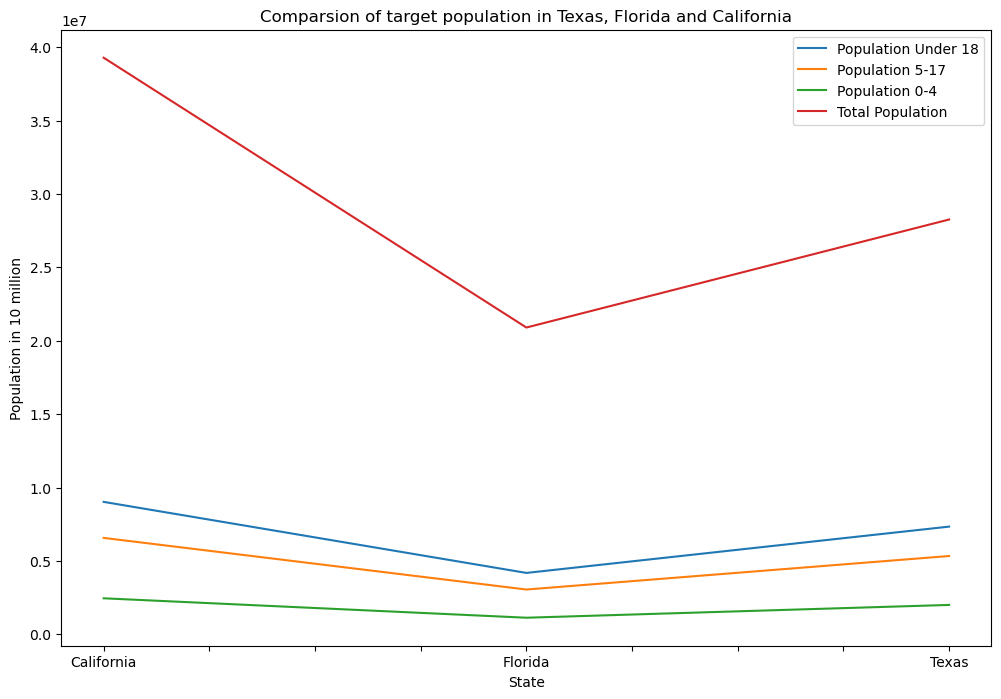

In [96]:
#graph for client 5 - comparison of stetwise population 
df__avg_5.plot(x='Description',y=['Population Under 18','Population 5-17','Population 0-4','Total Population'],figsize=(12,8))
plt.title("Comparsion of target population in Texas, Florida and California")
plt.xlabel("State")
plt.ylabel("Population in 10 million")
plt.show()